In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express   as px

import plotly.io as pio
png_renderer = pio.renderers["png"]

pio.renderers.default = "png"

# 1. Lecture des données

In [2]:
df = pd.read_excel("data/SDG_0111_SEX_AGE_RT_A-20241121T1751.xlsx")

In [3]:
print(df.shape)
df.head()

(9200, 7)


,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value
0,Angola,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2023,30.747
1,Angola,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2022,30.141
2,Angola,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2021,30.210
3,Angola,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2020,29.605
4,Angola,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2019,27.934


In [4]:
df.dtypes

ref_area.label      object
source.label        object
indicator.label     object
sex.label           object
classif1.label      object
time                 int64
obs_value          float64
dtype: object

# 2. Exploration des données

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns
remove_col = ['ref_area.label', 'source.label', 'indicator.label',]
print(categorical_columns)

Index(['ref_area.label', 'source.label', 'indicator.label', 'sex.label',
       'classif1.label'],
      dtype='object')


In [6]:
for col in categorical_columns:
    if col not in remove_col: 
        print(f"Nombre d'occurence des catégories de la colonnes {col}")
        print(df[col].value_counts())
        print("\n")

Nombre d'occurence des catégories de la colonnes sex.label
sex.label
Sex: Total     3200
Sex: Male      3000
Sex: Female    3000
Name: count, dtype: int64


Nombre d'occurence des catégories de la colonnes classif1.label
classif1.label
Age (Youth, adults): 15+      3200
Age (Youth, adults): 15-24    3000
Age (Youth, adults): 25+      3000
Name: count, dtype: int64




# Première visualisation

Faisons une première visualisation de l'indicateur par pays, groupe d'âge et années.

In [22]:
def plot_per_contry_age_time(df: pd.DataFrame, country: str="Cameroon", country_col: str='ref_area.label'):
    """Plot indicator per year, Age for one country
    Args:
        df (pd.DataFrame) : The dataframe
        Contry (str) : The name/code of the country
        Country_col (str) : The countries columns in the dataframe
    
    """
    try:
        indicator=df["indicator.label"].unique()[0].split("-")[1]
        country_df = df[(df[country_col] == country) & (df["sex.label"] == "Sex: Total")]
        ax = px.scatter(country_df, x='time', y='obs_value', color="classif1.label", title=f"{indicator} for: {country}")
        ax.show(height=500, width=2000)
        
    except:
        print("The country doesn't exist in the dataframe, try another one !!!!")

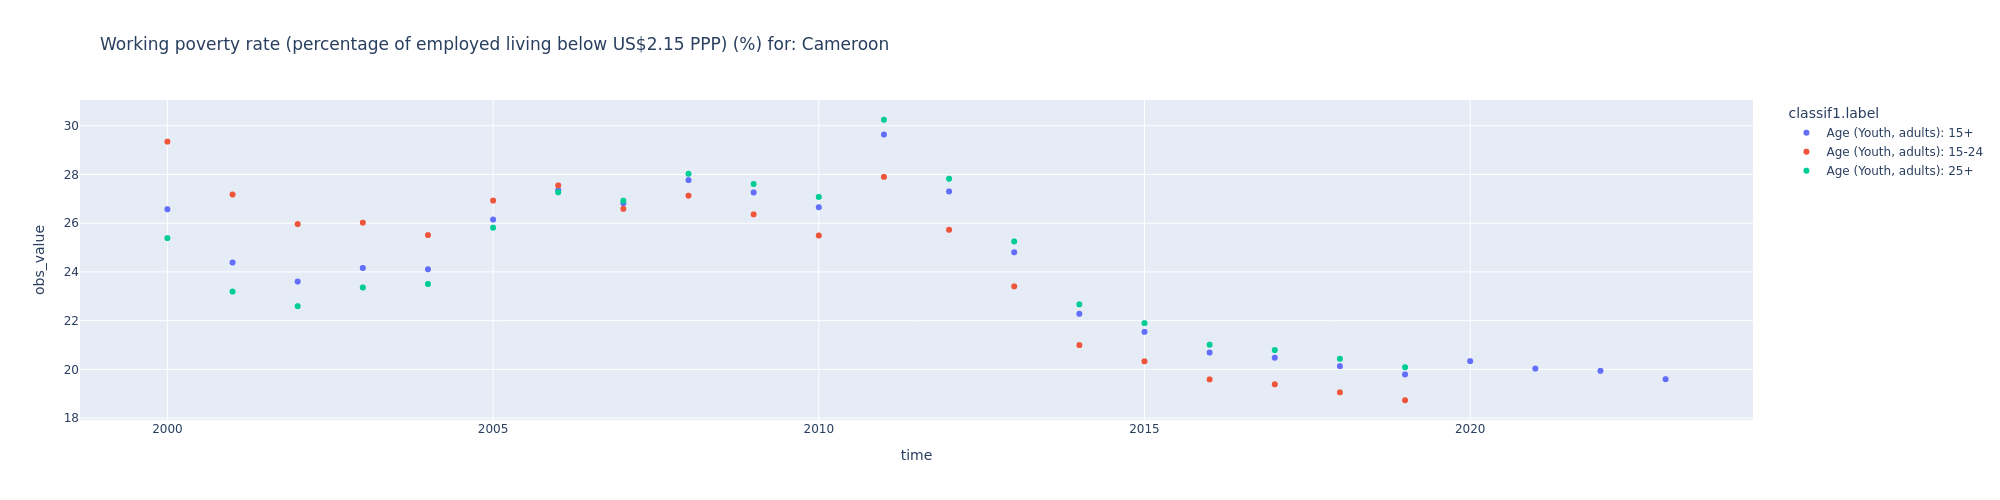

In [23]:
plot_per_contry_age_time(df)

In [13]:
def plot_pyramid_per_sex_country(df: pd.DataFrame, country: str="Cameroon", country_col: str='ref_area.label'):
    """
    
    """
    try:
        indicator=df["indicator.label"].unique()[0].split("-")[1]
        country_df = df[(df[country_col] == country)].pivot_table(columns="sex.label", values="obs_value", index="time").reset_index()
        # Create a pyramid plot
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot male data on the left (negative values)
        ax.barh(country_df['time'], -country_df['Sex: Male'], color='blue', label='Male')

        # Plot female data on the right
        ax.barh(country_df['time'], country_df['Sex: Female'], color='pink', label='Female')

        # Add labels and title
        ax.set_xlabel(f"{indicator}")
        ax.set_ylabel('Year')
        ax.set_title(f'{indicator} : {country}')
        ax.legend()

        # Customize the x-axis to show positive values for both sides
        xticks = ax.get_xticks()
        ax.set_xticklabels([abs(int(x)) for x in xticks])

        # Show the plot
        plt.show()
    except:
        print("The country doesn't exist in the dataframe, try another one !!!!")
    

/tmp/ipykernel_2632/2414375813.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



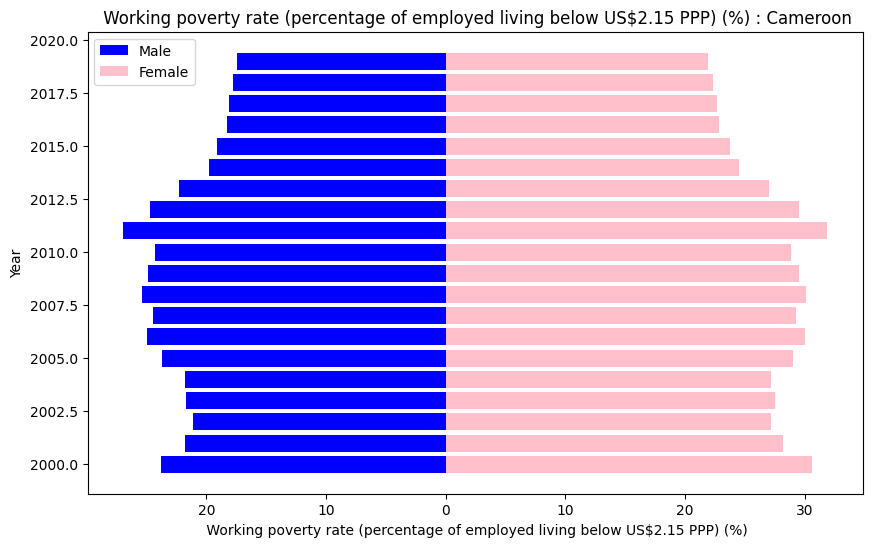

In [14]:
plot_pyramid_per_sex_country(df)